In [1]:
!pip install validators matplotlib

In [21]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import torchvision
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

Using cuda for inference


In [22]:
# resnet50 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_resnet50', pretrained=True)
resnet50 = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True,)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

resnet50.eval().to(device)

Using cache found in C:\Users\stans/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [23]:
uris = [
    'http://images.cocodataset.org/test-stuff2017/000000024309.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000028117.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000006149.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000004954.jpg',
]

batch = torch.cat(
    [utils.prepare_input_from_uri(uri) for uri in uris]
).to(device)

In [24]:
with torch.no_grad():
    output = torch.nn.functional.softmax(resnet50(batch), dim=1)
    
results = utils.pick_n_best(predictions=output, n=5)

AttributeError: 'list' object has no attribute 'softmax'

In [9]:
import matplotlib.pyplot as plt

In [18]:
im = np.array(batch[0].cpu()).T

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


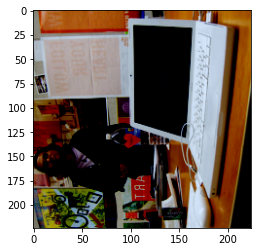

In [19]:
plt.imshow(im/im.max())

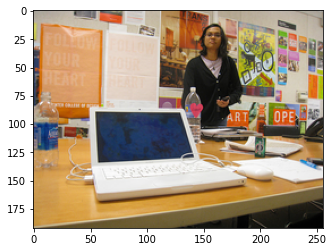

[('laptop, laptop computer', '34.7%'), ('mouse, computer mouse', '11.9%'), ('notebook, notebook computer', '10.9%'), ('monitor', '3.9%'), ('web site, website, internet site, site', '3.1%')]


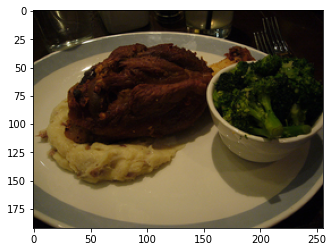

[('mashed potato', '78.6%'), ('broccoli', '7.3%'), ('meat loaf, meatloaf', '2.5%'), ('plate', '1.8%'), ('guacamole', '0.2%')]


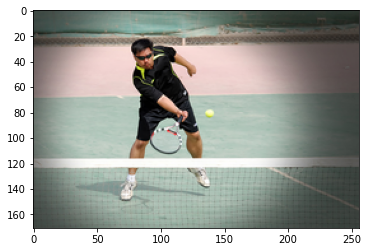

[('racket, racquet', '25.4%'), ('tennis ball', '6.0%'), ('ping-pong ball', '2.0%'), ('catamaran', '0.3%'), ('bathtub, bathing tub, bath, tub', '0.3%')]


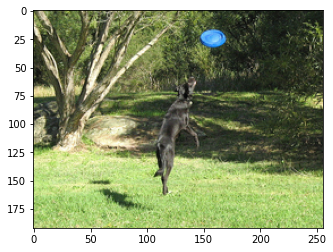

[('groenendael', '12.7%'), ('Scottish deerhound, deerhound', '11.2%'), ('flat-coated retriever', '6.6%'), ('kelpie', '6.1%'), ('Great Dane', '3.1%')]


In [11]:
for uri, result in zip(uris, results):
    img = Image.open(requests.get(uri, stream=True).raw)
    img.thumbnail((256,256), Image.ANTIALIAS)
    plt.imshow(img)
    plt.show()
    print(result)